<a href="https://colab.research.google.com/github/Cloud-Dark/nilai-estetik-makanan/blob/main/nilai_estetik_makanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.nasnet import preprocess_input, NASNetLarge
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def nilaiestetik(namepict):
    gambar = Image.open(namepict)


    # Menyesuaikan ukuran gambar dengan model
    ukuran_input = (331, 331)
    gambar = gambar.resize(ukuran_input)

    # Mengubah gambar menjadi array numpy
    gambar = np.array(gambar)

    # Menambahkan dimensi batch
    gambar = np.expand_dims(gambar, axis=0)

    # Praproses gambar
    gambar = preprocess_input(gambar)

    # Memuat model NASNetLarge
    model = NASNetLarge(weights='imagenet', include_top=True)

    # Memprediksi nilai estetika
    prediksi = model.predict(gambar)

    # Mendapatkan nilai estetika
    nilai_estetika = prediksi[0][0]
    formatted_number = f'{nilai_estetika:.20f}'
    return formatted_number


1/1 [==============================] - 5s 5s/step


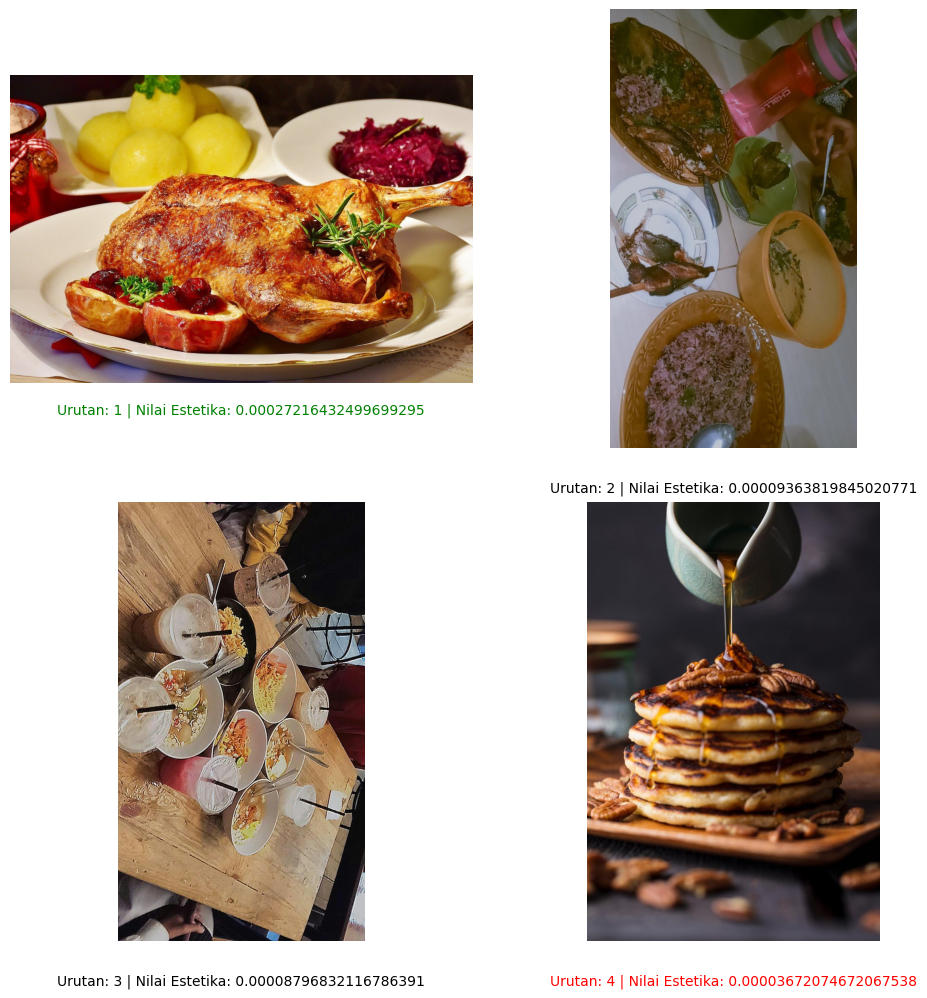

In [33]:
file_gambar = ["gambar1.jpg", "gambar2.jpg", "gambar3.jpg", "gambar4.jpg"]

# Urutkan gambar berdasarkan nilai estetika dari yang terbesar ke terkecil
file_gambar_sorted = sorted(file_gambar, key=lambda x: float(nilaiestetik(x)), reverse=True)

# Membuat subplot dengan susunan 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterasi untuk setiap gambar
for i, nama_gambar in enumerate(file_gambar_sorted):
    # Memanggil fungsi nilaiestetik dan mendapatkan nilai estetika
    nilai_estetika = nilaiestetik(nama_gambar)

    # Membuka gambar
    gambar = mpimg.imread(nama_gambar)

    # Menampilkan gambar di subplot yang sesuai
    axes[i//2, i%2].imshow(gambar)
    axes[i//2, i%2].axis('off')

    # Menentukan warna teks berdasarkan nilai estetika
    if i == 0:  # Gambar dengan nilai estetika terbaik
        color = 'green'
    elif i == len(file_gambar_sorted) - 1:  # Gambar dengan nilai estetika terburuk
        color = 'red'
    else:
        color = 'black'

    # Menambahkan teks urutan dan nilai estetika di bawah gambar dengan warna yang sesuai
    axes[i//2, i%2].text(0.5, -0.1, f'Urutan: {i+1} | Nilai Estetika: {nilai_estetika}', transform=axes[i//2, i%2].transAxes, ha='center', color=color)

# Menampilkan tampilan subplot
plt.tight_layout()
plt.show()